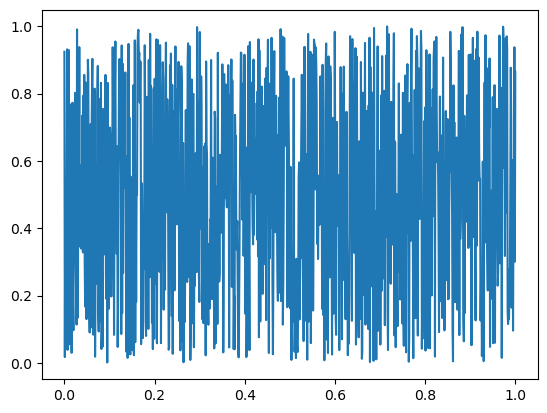

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)
y = np.random.rand(1000)
DATA = y

plt.plot(x, DATA)
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit, polyval

def DFA(DATA, win_length, order):
    # This function calculate the RMS (root mean squared value)
    # output1 is the RMS (root mean squared value)
    # win_length (selection of win_length wihtin DFA_main function);
    # order=1 (default to 1 in DFA_main function);
    N = len(DATA)  # length of the data
    n = int(np.floor(N / win_length))  # the number of windows
    N1 = n * win_length  # new length of the truncated data 

     # initialize y
    y = np.zeros(N1)  # sum of deviations from the grand mean in all data length
    # initialize fitcoef
    mean1 = np.mean(DATA[:N1]) # grand mean of the truncated data
    # sum of deviations from the grand mean in all data length
    for i in range(N1):
        y[i] = np.sum(DATA[:i+1] - mean1)

    # y = y.reshape(-1, 1) #  transpose for polyfit 
    # polynomial coefficients in each window
    fitcoef = np.zeros((n, order + 1))
    for j in range(n):
        fitcoef[j,:] = np.polyfit(np.arange(1, win_length+1), y[j*win_length:(j+1)*win_length], order)
    
    # initialize Yn (the new Y values in each window)
    Yn = np.zeros(N1)
    for j in range(n): # the number of windows
        Yn[j*win_length:(j+1)*win_length] = np.polyval(fitcoef[j,:], np.arange(1, win_length+1))

    sum1 = np.sum((y.T - Yn)**2) / N1 # take the mean square
    sum1 = np.sqrt(sum1) # take the root
    output1 = sum1 # the final RMS (root mean squared value)
    return output1 # RMS

def DFA_main(DATA):
    n = np.arange(5, len(DATA)/2, 5) # how many different win_lengths, customized to your data
    Nw = len(n) # number of different win_lengths
    F_n = np.zeros(Nw) # initialize RMS values in the FDA time series
    for i in range(Nw):
        F_n[i] = DFA(DATA, n[i], 1)

    A = np.polyfit(np.log10(n), np.log10(F_n), 1)
    Alpha1 = A[0]
    return Alpha1


In [36]:
# DFA_main
n = np.arange(5, len(DATA)/2, 5).astype(int) # how many different win_lengths, customized to your data
Nw = len(n) # number of different win_lengths
F_n = np.zeros(Nw) # initialize RMS values in the FDA time series
for i in range(Nw):
    F_n[i] = DFA(DATA, n[i], 1)
    
A = np.polyfit(np.log10(n), np.log10(F_n), 1)
Alpha1 = A[0]
FitValues = np.polyval(A, np.log10(n))

Text(0.5, 1.0, 'DFA: Alpha1 = 0.44900889107380143')

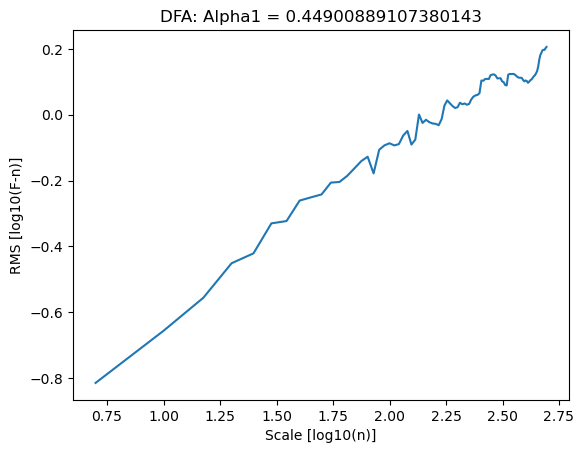

In [38]:
plt.plot(np.log10(n), np.log10(F_n))
plt.xlabel('Scale [log10(n)]')
plt.ylabel('RMS [log10(F-n)]')
plt.title('DFA: Alpha1 = '+str(Alpha1))

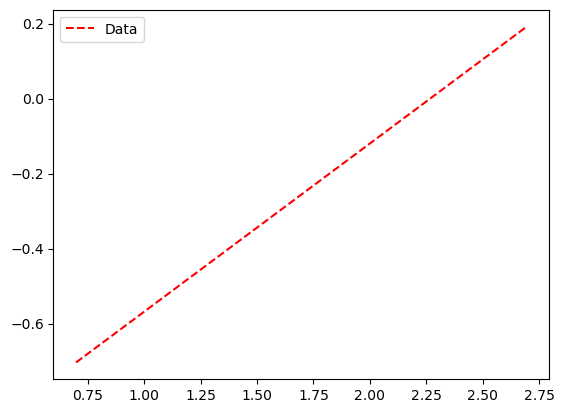

In [39]:
plt.plot(np.log10(n), FitValues, 'r--')
plt.legend(['Data', f"Fit (DFA={Alpha1:.2f})"])
plt.show()